In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [65]:
data_set = pd.read_csv("data/fifa21_raw_data.csv", low_memory=False)

In [66]:
data_set
fifa21_data = data_set.copy(deep=True)

### Getting all the columns

In [67]:
fifa21_data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

### Converting the Heights and Weights Columns to numerical form 

In [68]:
fifa21_data.rename(columns={"Height": "Height(inches)", "Weight": "Weight(lbs)"}, inplace=True)

In [69]:
# Height convertion to 
def convert_height(val):
    quote_index = val.index("'")
    d_quote_index = val.index('"')

    d_quote_index
    quote_index

    return ((int(val[0:int(quote_index)]) * 12) + int(val[int(quote_index) + 1 : int(d_quote_index)]))

fifa21_data["Height(inches)"] = fifa21_data["Height(inches)"].apply(convert_height)

In [70]:
fifa21_data["Height(inches)"]

0        67
1        74
2        74
3        71
4        69
         ..
18974    70
18975    67
18976    70
18977    69
18978    69
Name: Height(inches), Length: 18979, dtype: int64

### Replacing lbs in weight with empty str

In [71]:
fifa21_data["Weight(lbs)"] = fifa21_data["Weight(lbs)"].str.replace("lbs", "")

In [72]:
fifa21_data["Weight(lbs)"]

0        159
1        183
2        192
3        154
4        150
        ... 
18974    154
18975    128
18976    146
18977    143
18978    150
Name: Weight(lbs), Length: 18979, dtype: object

In [73]:
## Converting the two columns to numeric
fifa21_data["Height(inches)"] = pd.to_numeric(fifa21_data["Height(inches)"])
fifa21_data["Weight(lbs)"] = pd.to_numeric(fifa21_data["Weight(lbs)"])

In [74]:
fifa21_data[["Height(inches)", "Weight(lbs)"]].dtypes

Height(inches)    int64
Weight(lbs)       int64
dtype: object

### Remove the unnecessary newline characters from all columns that have them.

In [75]:
fifa21_data["Team & Contract"] = fifa21_data["Team & Contract"].str.replace("\n", "")
fifa21_data["Hits"] = fifa21_data["Hits"].str.replace("\n", "")

In [76]:
fifa21_data

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,...,High,High,4 ★,76,86,93,88,64,78,163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,...,High,Medium,5 ★,91,85,86,94,36,59,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020,...,Low,Low,1 ★,58,23,26,27,50,48,2
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,Oldham Athletic2020 ~ 2021,...,Medium,Medium,1 ★,70,46,40,53,16,40,3
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,Wuhan Zall2018 ~ 2022,...,Medium,Medium,1 ★,64,28,26,38,48,51,3
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,Oldham Athletic2020 ~ 2021,...,Medium,Medium,1 ★,64,40,48,49,35,45,5


### Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!

In [77]:
## converting to datetime object
fifa21_data["Joined"] = pd.to_datetime(fifa21_data["Joined"])

current_year = datetime.now().year # Get the current year


fifa21_data[(current_year - fifa21_data["Joined"].dt.year) >= 10][["Name", "Age", "Joined"]]

,Name,Age,Joined
0,L. Messi,33,2004-07-01
2,J. Oblak,27,2014-07-16
5,R. Lewandowski,31,2014-07-01
11,M. ter Stegen,28,2014-07-01
12,Casemiro,28,2013-07-11
...,...,...,...
18093,Cui Ming'an,25,2014-01-01
18258,Song Zhiwei,31,2014-01-09
18274,G. Harkin,32,2014-01-01
18413,J. Stevens,22,2014-07-01


### 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.

In [78]:
fifa21_data.rename(columns={"Value": "Value(Euro)", "Wage": "Wage(Euro)", "Release Clause": "Release Clause(Euro)"}, inplace=True)


In [79]:
fifa21_data[["Value(Euro)", "Wage(Euro)", "Release Clause(Euro)"]]

fifa21_data["Value(Euro)"] = fifa21_data["Value(Euro)"].str.replace("€", "")
fifa21_data["Wage(Euro)"] = fifa21_data["Wage(Euro)"].str.replace("€", "")
fifa21_data["Release Clause(Euro)"] = fifa21_data["Release Clause(Euro)"].str.replace("€", "")

def convert_2_num(val):
    if val.endswith("M"):
        return (float(val[0:-1]) * 1_000_000)
    elif val.endswith("K"):
        return (float(val[0:-1]) * 1_000)
    else:
        return val
    


fifa21_data["Value(Euro)"] = fifa21_data["Value(Euro)"].apply(convert_2_num)
fifa21_data["Wage(Euro)"] = fifa21_data["Wage(Euro)"].apply(convert_2_num)
fifa21_data["Release Clause(Euro)"] = fifa21_data["Release Clause(Euro)"].apply(convert_2_num)

    

In [80]:
fifa21_data[["Value(Euro)", "Wage(Euro)", "Release Clause(Euro)"]]

,Value(Euro),Wage(Euro),Release Clause(Euro)
0,67500000.0,560000.0,138400000.0
1,46000000.0,220000.0,75900000.0
2,75000000.0,125000.0,159400000.0
3,87000000.0,370000.0,161000000.0
4,90000000.0,270000.0,166500000.0
...,...,...,...
18974,35000.0,1000.0,57000.0
18975,60000.0,500,165000.0
18976,40000.0,1000.0,70000.0
18977,60000.0,500,165000.0


In [81]:
## Converting to numeric

fifa21_data["Value(Euro)"] = pd.to_numeric(fifa21_data["Value(Euro)"])
fifa21_data["Wage(Euro)"] = pd.to_numeric(fifa21_data["Wage(Euro)"])
fifa21_data["Release Clause(Euro)"] = pd.to_numeric(fifa21_data["Release Clause(Euro)"])

### Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical

In [82]:
fifa21_data["IR"] = fifa21_data["IR"].str.replace("★", "")

In [83]:
fifa21_data["IR"] = pd.to_numeric(fifa21_data["IR"])

In [86]:
fifa21_data['IR']

0        5
1        5
2        3
3        4
4        5
        ..
18974    1
18975    1
18976    1
18977    1
18978    1
Name: IR, Length: 18979, dtype: int64

### Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

In [98]:
fifa21_data[["LongName", "Value(Euro)", "Wage(Euro)"]]

,LongName,Value(Euro),Wage(Euro)
0,Lionel Messi,67500000.0,560000.0
1,C. Ronaldo dos Santos Aveiro,46000000.0,220000.0
2,Jan Oblak,75000000.0,125000.0
3,Kevin De Bruyne,87000000.0,370000.0
4,Neymar da Silva Santos Jr.,90000000.0,270000.0
...,...,...,...
18974,Mengxuan Zhang,35000.0,1000.0
18975,Vani Da Silva,60000.0,500.0
18976,Ao Xia,40000.0,1000.0
18977,Ben Hough,60000.0,500.0


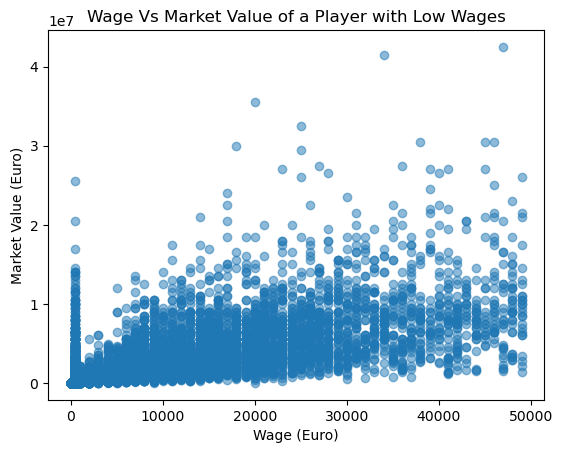

In [105]:
LOW_WAGE_TARGET = 50_000
low_wage_players = fifa21_data[fifa21_data["Wage(Euro)"] < LOW_WAGE_TARGET]

## Ploting a scatter plot
plt.scatter(low_wage_players["Wage(Euro)"], low_wage_players["Value(Euro)"], alpha=0.5)
plt.xlabel("Wage (Euro)")
plt.ylabel("Market Value (Euro)")
plt.title("Wage Vs Market Value of a Player with Low Wages")
plt.show()